In [2]:
!python -m venv env
!source env/bin/activate

'source' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install opencv-python numpy scikit-learn matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
#Imports
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [22]:
#Loading the dataset
data = 'data'

class_labels = ['cloudy', 'desert', 'green_area', 'water']
labels = {}
for i in range(len(class_labels)):
    labels[i] = class_labels[i]

x = []
y = []

In [23]:
#Data Preprocessing
for i,folder in enumerate(os.listdir(data)):
    fol_path = os.path.join(data,folder)
    for file in os.listdir(fol_path):
        if file.endswith(".jpg"):
            img_path = os.path.join(fol_path,file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64,64))
            x.append(img)
            y.append(i)

In [24]:
#Convert Data into numpy arrays
x = np.array(x)
y = np.array(y)

In [25]:
#Splitting the dataset into the test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x.shape)
print(y.shape)

print(x_train.dtype)
print(y_train.dtype)

(5631, 64, 64, 3)
(5631,)
uint8
int32


In [26]:
#Normalising image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [27]:
#Building the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(len(class_labels), activation='softmax')
])

In [28]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
#Training the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
141/141 [==============================] - 2s 10ms/step - loss: 0.6204 - accuracy: 0.7156 - val_loss: 0.4271 - val_accuracy: 0.8190
Epoch 2/10
141/141 [==============================] - 1s 9ms/step - loss: 0.3932 - accuracy: 0.8384 - val_loss: 0.3502 - val_accuracy: 0.8713
Epoch 3/10
141/141 [==============================] - 1s 9ms/step - loss: 0.3396 - accuracy: 0.8635 - val_loss: 0.3928 - val_accuracy: 0.8323
Epoch 4/10
141/141 [==============================] - 1s 9ms/step - loss: 0.3354 - accuracy: 0.8630 - val_loss: 0.3067 - val_accuracy: 0.8607
Epoch 5/10
141/141 [==============================] - 1s 8ms/step - loss: 0.3265 - accuracy: 0.8637 - val_loss: 0.3320 - val_accuracy: 0.8563
Epoch 6/10
141/141 [==============================] - 1s 8ms/step - loss: 0.2945 - accuracy: 0.8850 - val_loss: 0.2802 - val_accuracy: 0.8873
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.3028 - accuracy: 0.8801 - val_loss: 0.3063 - val_accuracy: 0.8909
Epoch

In [30]:
#Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = y_test

36/36 [==============================] - 0s 3ms/step


In [31]:
#Compute accuracy
acc = np.mean(y_pred == y_true)
print('Accuracy: ', acc)

Accuracy:  0.8731144631765749


([<matplotlib.axis.YTick at 0x2424cd30ee0>,
 [Text(0, 0, 'cloudy'),
  Text(0, 1, 'desert'),
  Text(0, 2, 'green_area'),
  Text(0, 3, 'water')])

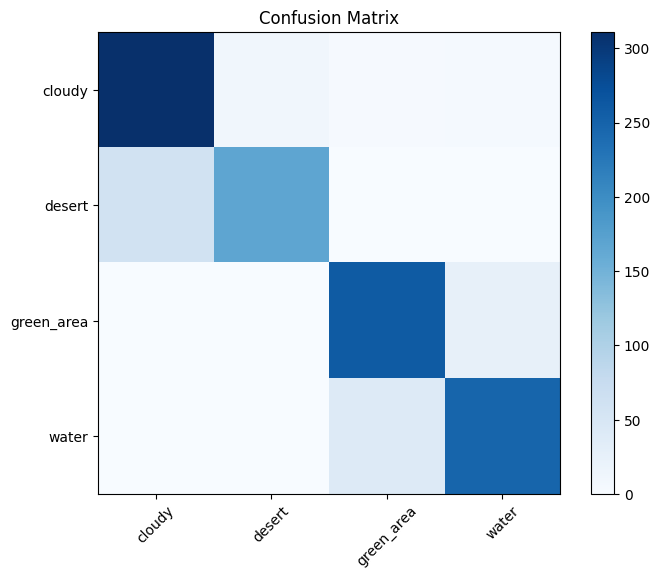

In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

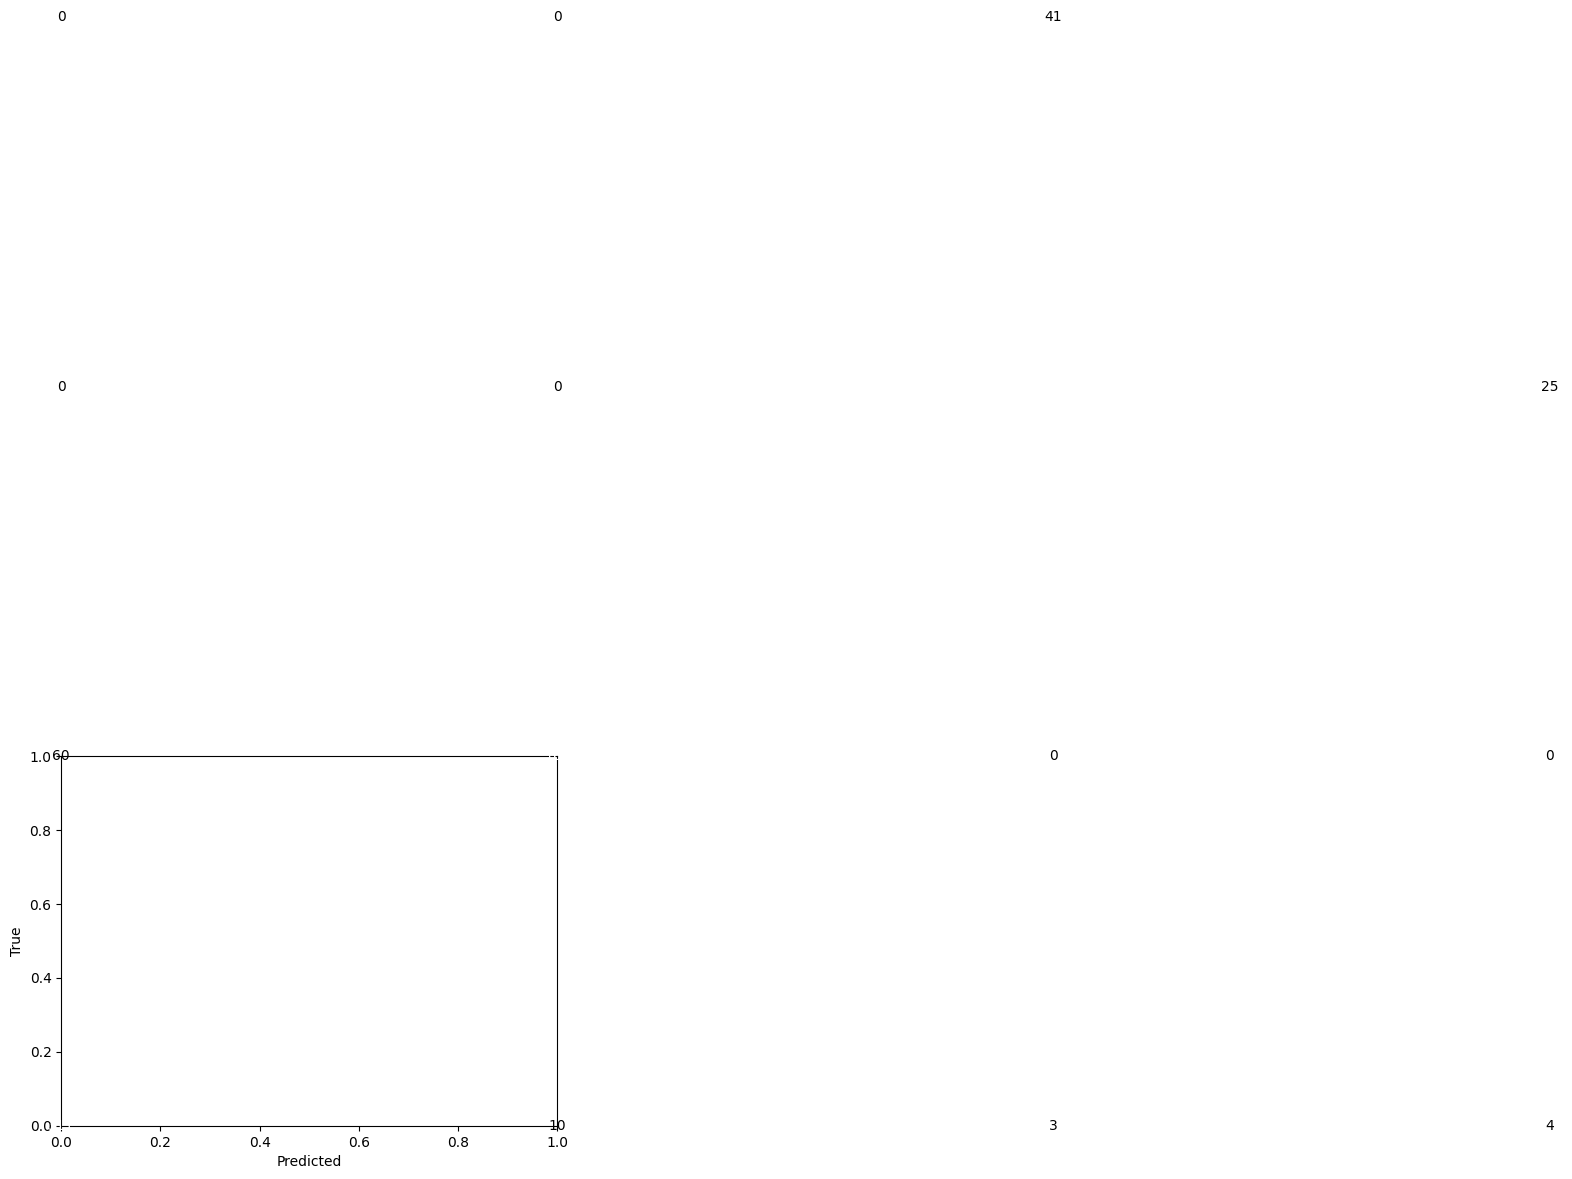

In [33]:
# Add numerical labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()